In [2]:
import numpy as np

# dimer
# ref
# converged SCF energy = -112.396217148092
# E_corr(MP2) -0.375455078499673
# E(RCCSD) = -112.8036440290277  E_corr = -0.4074268809354146
# AFQMC/UCCSD_PT2 energy (direct obs): -112.812663 +/- 0.000100
# total run time: 296.31

hf = -112.396217148092
dm_ref_ccsd = -0.4074268809354146
dm_ref_afqmc = -112.812663 - hf
print(dm_ref_afqmc)
dm_ref_afqmc_err = 0.000100

data = '''
#   thresh      MP2            CCSD             AFQMC/CCSD_PT2             mp2_cr        time
    1e-5    -0.37396527     -0.40615577     -0.414793 +/- 0.000142      -0.00148980     321.39
    3e-6    -0.37493691     -0.40702825     -0.415858 +/- 0.000112      -0.00051817     366.10
    1e-6    -0.37533451     -0.40733997     -0.416230 +/- 0.000128      -0.00012057     400.41
    3e-7    -0.37541172     -0.40739235     -0.416116 +/- 0.000114      -0.00004335     408.46
#   ref     -0.37545507     -0.40742688     -0.416445 +/- 0.000100       0.00000000     296.31
'''

thresh = []
dm_mp2 = []
dm_ccsd = []
dm_afqmc = []
dm_afqmc_err = []
dm_mp2cr = []
for line in data.splitlines():
    if not line.startswith('#') and len(line)>0:
        parts = line.split()
        thresh = np.hstack((thresh,[float(parts[0])]))
        dm_mp2 = np.hstack((dm_mp2,[float(parts[1])]))
        dm_ccsd = np.hstack((dm_ccsd,[float(parts[2])]))
        dm_afqmc = np.hstack((dm_afqmc,[float(parts[3])]))
        dm_afqmc_err = np.hstack((dm_afqmc_err,[float(parts[5])]))
        dm_mp2cr = np.hstack((dm_mp2cr,[float(parts[6])]))

dm_ref_ccsd = np.array([dm_ref_ccsd]*len(dm_ccsd))
dm_ref_afqmc = np.array([dm_ref_afqmc]*len(dm_afqmc))
dm_ref_afqmc_err = dm_ref_afqmc_err * 2
dm_afqmc_err = dm_afqmc_err * 2

-0.4164458519079943


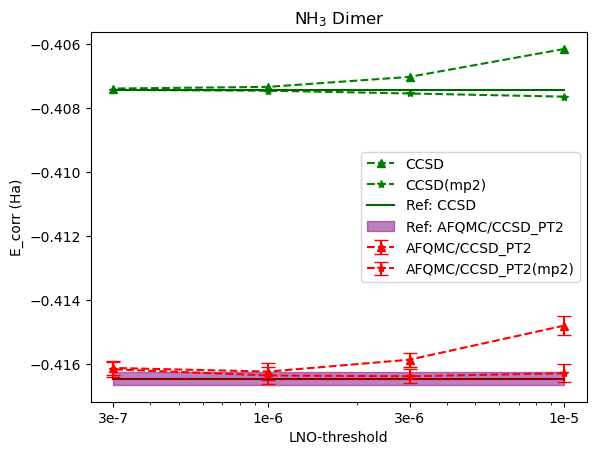

In [3]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(10, 6))
plt.plot(thresh,dm_ccsd,'^--',color='green',label='CCSD')
plt.plot(thresh,dm_ccsd+dm_mp2cr,'*--',color='green',label='CCSD(mp2)')
plt.errorbar(thresh,dm_afqmc,dm_afqmc_err,fmt='^--',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.errorbar(thresh,dm_afqmc+dm_mp2cr,dm_afqmc_err,fmt='*--',capsize=5, color='red', label='AFQMC/CCSD_PT2(mp2)')
plt.plot(thresh,dm_ref_ccsd,'-',color='darkgreen',label='Ref: CCSD')
plt.plot(thresh,dm_ref_afqmc,'-', color='darkred')
plt.fill_between(np.linspace(thresh[0],thresh[-1],50),
                 dm_ref_afqmc[0]-dm_ref_afqmc_err,dm_ref_afqmc[0]+dm_ref_afqmc_err,
                 color='purple', alpha = 0.5, label='Ref: AFQMC/CCSD_PT2')
plt.xscale('log')
ticks = [1e-5, 3e-6, 1e-6, 3e-7]
labels = ['1e-5', '3e-6', '1e-6', '3e-7']
plt.xticks(ticks, labels)
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('NH$_3$ Dimer')
plt.legend()
plt.show()

In [24]:
# monomer 1
# converged SCF energy = -76.0265821108628
# E_corr(MP2) -0.144655164155928
# E(RCCSD) = -76.17717146171265  E_corr = -0.1505893508490376
# AFQMC/UCCSD_PT2 energy (direct obs): -76.179755 +/- 0.000035
# total run time: 67.43

# monomer 2
# converged SCF energy = -76.0266894617759
# E_corr(MP2) -0.144559508549431
# E(RCCSD) = -76.17718176020618  E_corr = -0.1504922984296421
# AFQMC/UCCSD_PT2 energy (direct obs): -76.179799 +/- 0.000035